In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import pandas as pd
import math

In [6]:
img = cv2.imread('/content/rubiks.jpg',0)

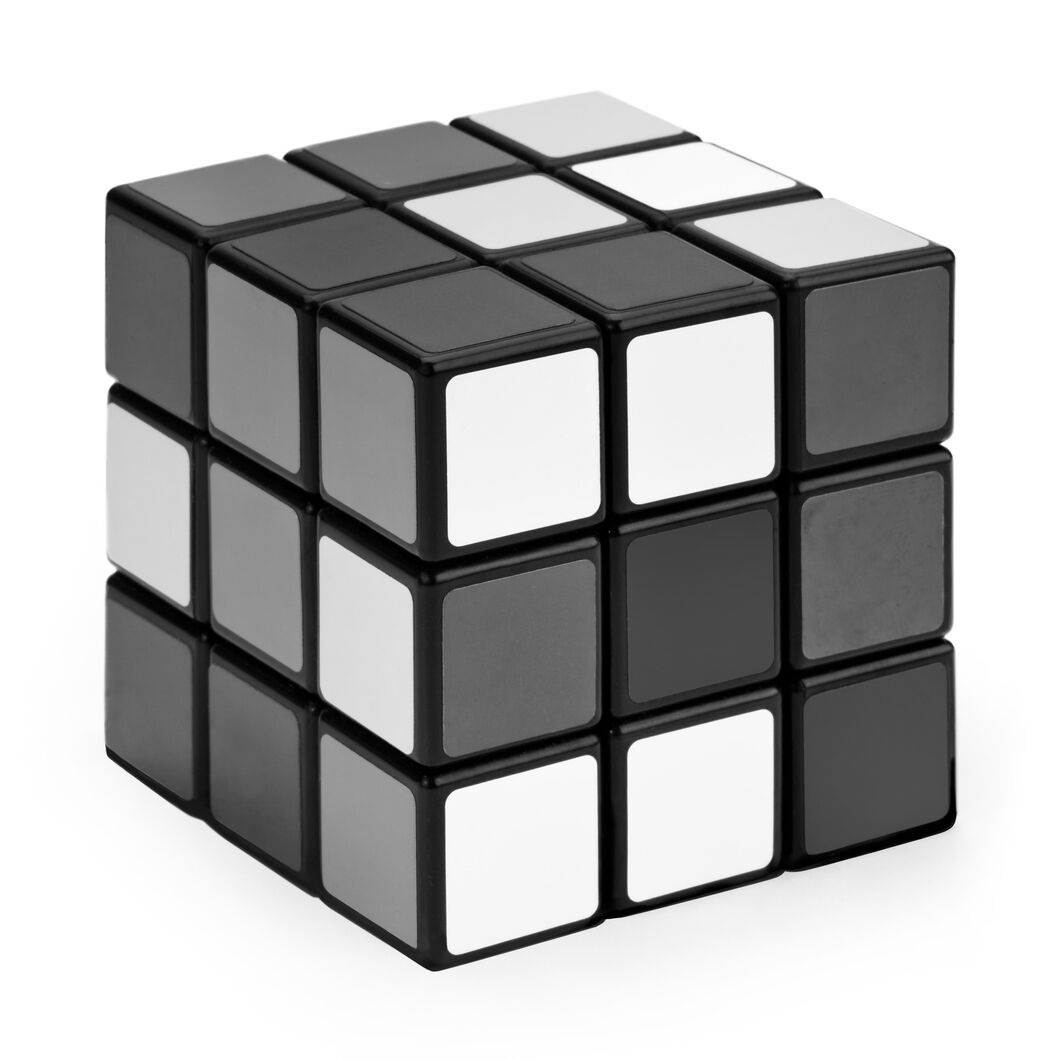

In [7]:
cv2_imshow(img)

In [8]:
row,col = img.shape

In [14]:
Hlow = np.zeros((row,col),dtype=np.float32)

In [15]:
Hhigh = np.zeros((row,col),dtype=np.float32)

In [16]:
Do = 50
n=1

**Make Filters**

In [17]:
for u in range(row):
  for v in range(col):
    D = np.sqrt((u-row/2)**2 + (v-col/2)**2)
    Hlow[u,v] = 1/(1+(D/Do)**(2*n))
    Hhigh[u,v] = 1/(1+(Do/D)**(2*n))

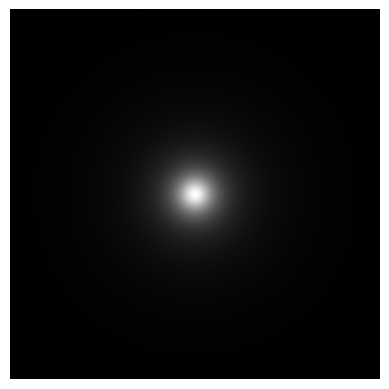

In [20]:
plt.imshow(Hlow,cmap='gray')
plt.axis('off')
plt.show()

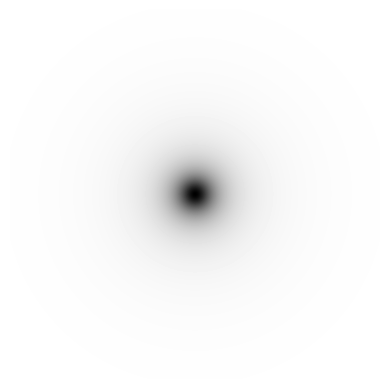

In [21]:
plt.imshow(Hhigh,cmap='gray')
plt.axis('off')
plt.show()

**Butterworth Low pass Filtering**

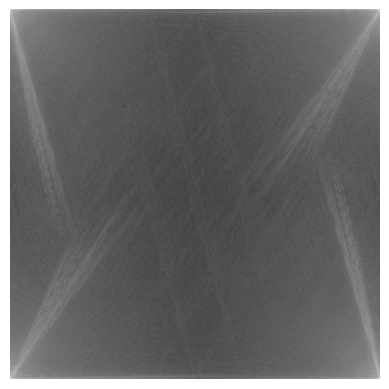

In [18]:
F = np.fft.fft2(img)
plt.imshow(np.log1p(np.abs(F)),cmap='gray')
plt.axis('off')
plt.show()

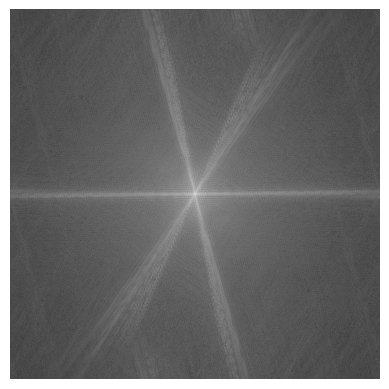

In [19]:
Fshift = np.fft.fftshift(F)
plt.imshow(np.log1p(np.abs(Fshift)),cmap='gray')
plt.axis('off')
plt.show()

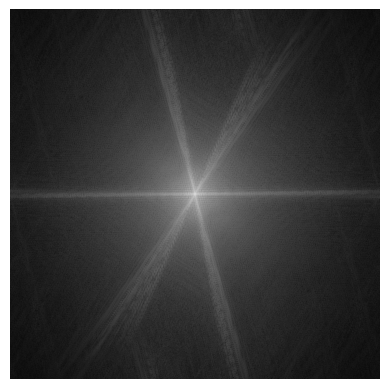

In [22]:
Gshift = Fshift * Hlow
plt.imshow(np.log1p(np.abs(Gshift)),cmap='gray')
plt.axis('off')
plt.show() 

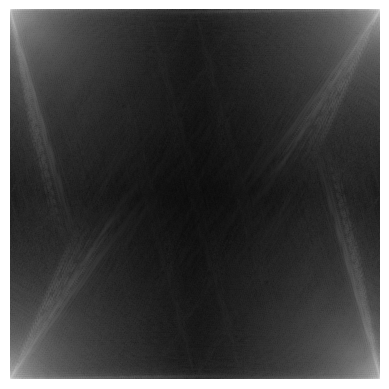

In [23]:
#Inverse Fourier Transformation
G = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)),cmap='gray')
plt.axis('off')
plt.show()

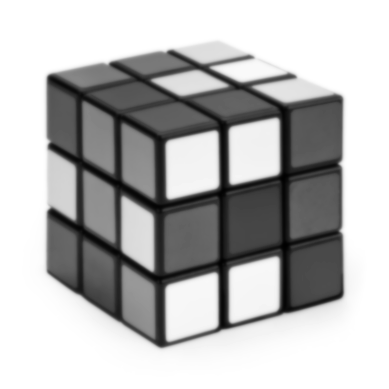

In [24]:
g = np.abs(np.fft.ifft2(G))
plt.imshow(g,cmap='gray')
plt.axis('off')
plt.show()

**Butterworth  High Pass Filtering**

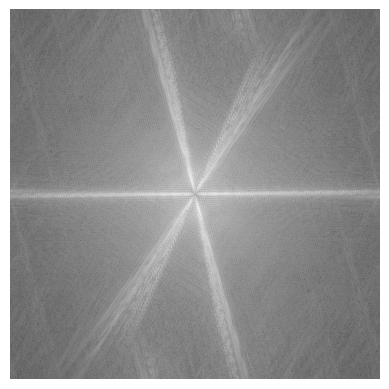

In [25]:
Gshift = Fshift * Hhigh
plt.imshow(np.log1p(np.abs(Gshift)),cmap='gray')
plt.axis('off')
plt.show()

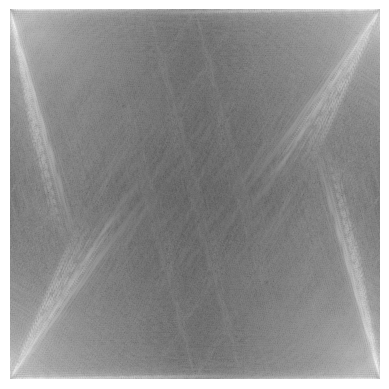

In [26]:

G = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)),cmap='gray')
plt.axis('off')
plt.show()

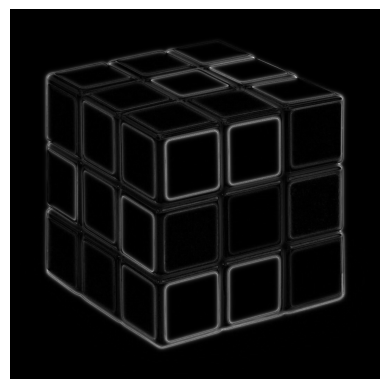

In [27]:
g = np.abs(np.fft.ifft2(G))
plt.imshow(g,cmap='gray')
plt.axis('off')
plt.show()